# Instructions

The places where you have enter code, to answer the questions, are marked with `# YOUR CODE HERE`.

## Question 1 (6 points)

Given the following QUBO, complete the function `create_bqm` so that it returns the corresponding BQM.

$$- 7x_1 - 2x_2 - 10x_3 - 4x_4 + 5x_1x_2 + 3x_1x_3 + 6x_2x_3 - 8x_3x_4 - 2$$


The function `create_bqm` has

- Input: None
- Returns:
    - A BQM instance


In [12]:
from dimod import BQM

def create_bqm():
    
    Q = {('x1', 'x1'): -7, ('x2', 'x2'): -2, ('x3', 'x3'): -10, ('x4', 'x4'): -4,
         ('x1', 'x2'): 5, ('x1', 'x3'): 3, ('x2', 'x3'): 6, ('x3', 'x4'): -8}
    offset = -2
    bqm = BQM.from_qubo(Q, offset)

    # YOUR CODE HERE
    # Do not modify anything below this line
    return bqm

In [13]:
# You can use this cell to call and check the output of the function

print(create_bqm())

BinaryQuadraticModel({'x1': -7.0, 'x2': -2.0, 'x3': -10.0, 'x4': -4.0}, {('x2', 'x1'): 5.0, ('x3', 'x1'): 3.0, ('x3', 'x2'): 6.0, ('x4', 'x3'): -8.0}, -2.0, 'BINARY')


In [14]:
# hidden tests will be used for grading.

## Question 2 (6 points)

Function `solve_Q` takes as input a matrix representation of a QUBO formulation. Complete the function `solve_Q` so that it returns the solution to the given problem. Use D-Wave's `ExactSolver()`.


The function `solve_Q` has

- Input:
    - Q matrix representation of QUBO as an `numpy.array`.
- Returns:
    - Sample with the lowest energy (first sample of the SampleSet)


In [15]:
from dimod import BQM


def solve_Q(Q):
    bqm = BQM.from_qubo(Q)

    sampler = ExactSolver()
    sampleset = sampler.sample(bqm)

    # YOUR CODE HERE
    # Do not modify anything below this line
    return sampleset.first

In [16]:
# You can use this cell to call and check the output of the function
import numpy as np
from dimod.reference.samplers import ExactSolver


Q = np.array([[1, 1], [0, 1]])
print(solve_Q(Q))

Sample(sample={0: np.int8(0), 1: np.int8(0)}, energy=np.float64(0.0), num_occurrences=np.int64(1))


In [17]:
# hidden tests will be used for grading.

## Question 3 (6 points)

You are given a graph $G$ in the next cell where the nodes are labeled $0,1,\dots,8$. Create a BQM with `SPIN` variables to solve Max-Cut problem for the given graph. Variables should be named with the name of the correspoding node.

The function `max_cut` has

- Input: None 
- Returns:
    - BQM with SPIN variables for graph `G`


EdgeView([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)])

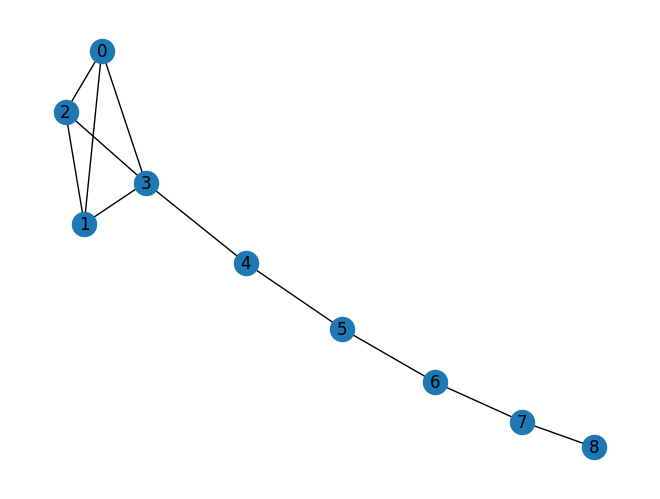

In [18]:
import networkx as nx

G = nx.lollipop_graph(4, 5)
nx.draw(G, with_labels=True)
G.edges

In [19]:
from dimod import BQM


def max_cut():
    """
    from collections import defaultdict
    h = defaultdict(int)
    J = defaultdict(int)


    for i, j in G.edges:
        J[(i, j)] += 1
    
    
    bqm = BQM.from_ising(h, J)"""

    # The Max-Cut Hamiltonian has quadratic terms with coefficient +1 for each edge
    # and no linear terms.
    # J represents the quadratic coefficients (couplings).
    J = {edge: 1 for edge in G.edges()}

    # h represents the linear coefficients (biases), which are all zero for this problem.
    h = {}

    # Create the BQM from the Ising formulation (h, J).
    # BQM.from_ising automatically uses SPIN variables.
    bqm = BQM.from_ising(h, J)

    # YOUR CODE HERE
    # Do not modify anything below this line
    return bqm

In [20]:
# You can use this cell to call and check the output of the function
print(max_cut())

BinaryQuadraticModel({0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, {(1, 0): 1.0, (2, 0): 1.0, (2, 1): 1.0, (3, 0): 1.0, (3, 1): 1.0, (3, 2): 1.0, (4, 3): 1.0, (5, 4): 1.0, (6, 5): 1.0, (7, 6): 1.0, (8, 7): 1.0}, 0.0, 'SPIN')


In [21]:
# hidden tests will be used for grading.
# If this cell results in an error, your implementation is incorrect